# 소프트맥스 회귀 Softmax Regression - 다항분류
## 다항분류(다중 클래스 분류)의 이해
### 1) 다항 분류
- 이진 분류: 두 개의 선택지 중 하나를 고르는 문제
    -> 로지스틱 회귀
- `다항 분류`: 세 개 이상의 선택지 중 하나를 고르는 문제
    -> 소프트맥스 회귀


### 2) 소프트맥스 함수
- `다항 분류 활성화 함수`
- 뉴런의 출력값에 대하여 class 분류를 위하여 마지막 단계에서 `출력값에 대한 정규화를 해주는 함수`
- 결과물의 수치의 합은 언제나 1.0
- 소프트맥스 함수의 출력값은 확률로 해석할 수 있다
> 사진 속 인물이 지금 슬픈 표정인지, 웃는 표정인지, 화난 표정인지 확률적으로 수치화 한다고 했을 때,
>
> 슬픔(11%), 웃음(29%), 화남(60%)과 같이 확률적 분류를 할 때 용이

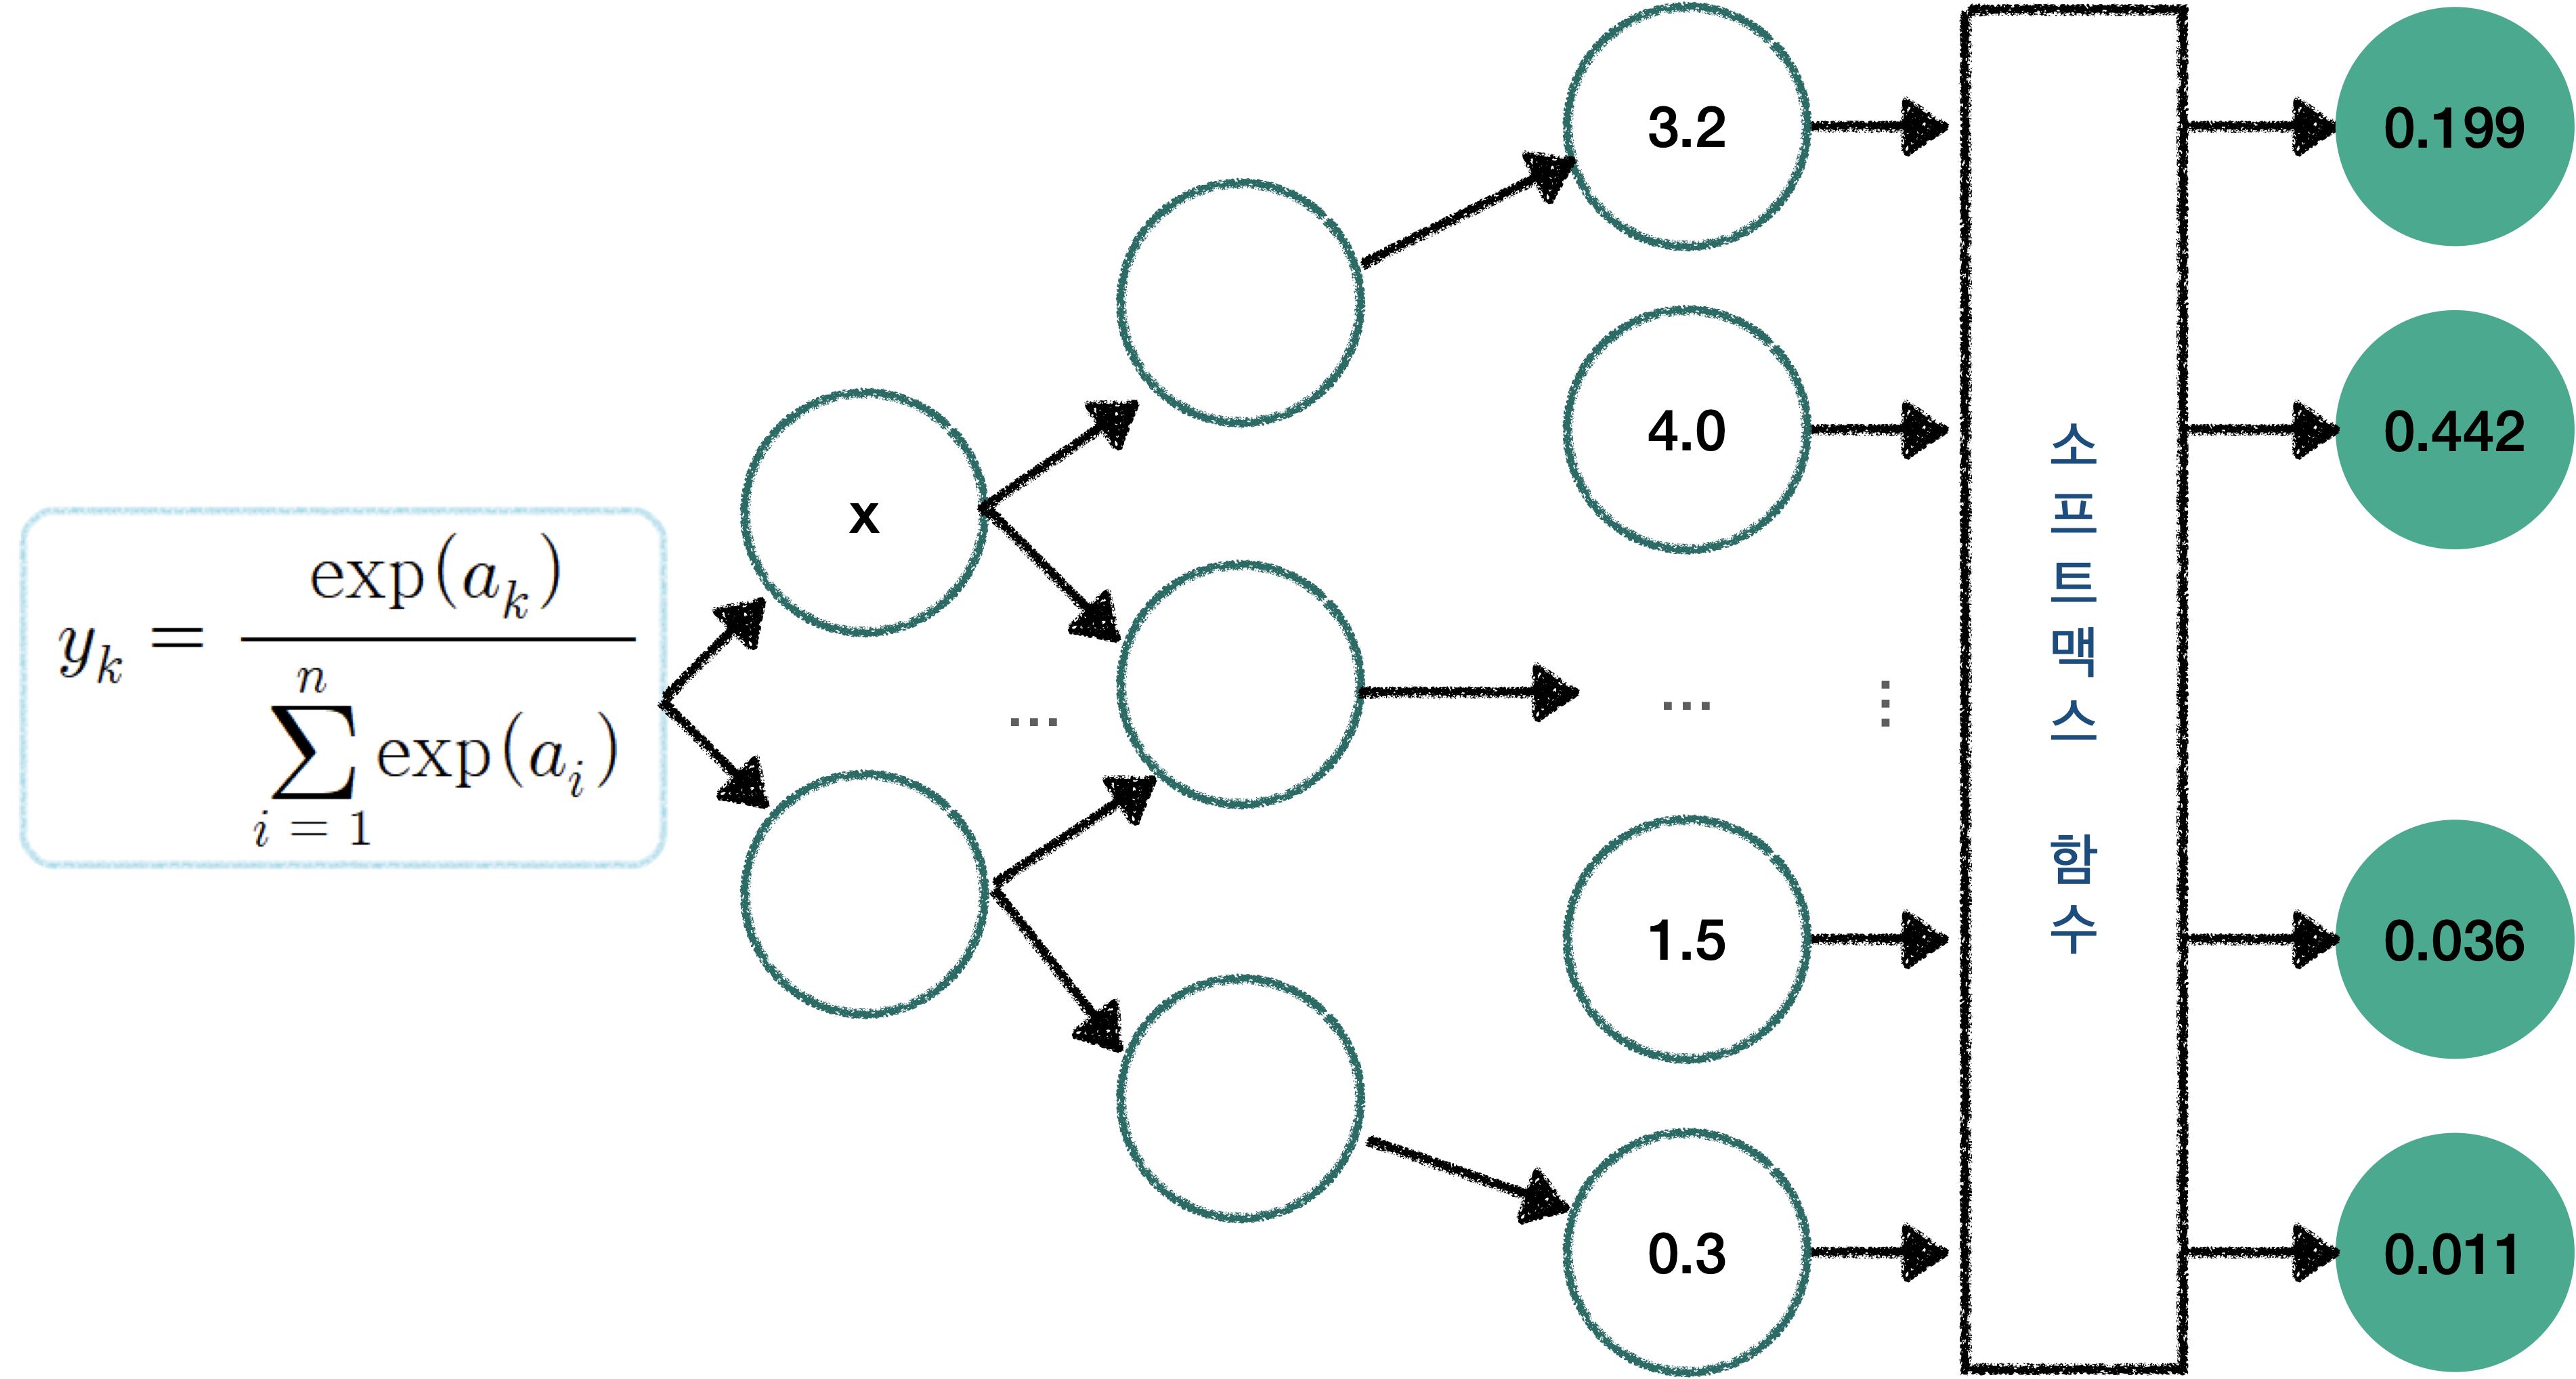

In [22]:
from IPython.display import display, Image
display(Image(filename='image22_softmax.png'))

- exp(x)는 지수함수(Exponential Function)이다. (e는 자연상수)
- n은 출력층의 뉴런 수, yk는 그 중 k번째 출력을 뜻한다

## 소프트맥스 회귀 (다항분류) 수행

### 1) 패키지 준비하기

In [23]:
import sys
sys.path.append('../../')
import helper

import numpy as np
import seaborn as sb
from pandas import read_excel, DataFrame, pivot_table
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

### 2) 데이터셋 준비하기
- 아이리스(붓꽃)의 꽃잎에 대한 각 부분의 너비와 길이 등을 측정한 데이터이며 `150`개의 레코드로 구성
- 꽃받침의 길이, 너비, 꽃잎의 길이, 너비 등을 토대로 `3가지로 나뉘는 붓꽃의 종류`를 분류하는 학습 모델을 구성할 수 있다

In [24]:
origin = read_excel('https://data.hossam.kr/F03/iris.xlsx')
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 3) 데이터 전처리
- 결측치 확인

In [25]:
origin.isna().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

- 종속변수 라벨링을 위해 값의 종류 확인

In [26]:
uni = origin['Species'].unique()
print(uni)

['setosa' 'versicolor' 'virginica']


- 종속변수 라벨링

In [27]:
origin['Species'] = origin['Species'].astype('category').cat.rename_categories({'setosa': 0, 'virginica': 1, 'versicolor': 2})
origin['Species'].value_counts()

Species
0    50
2    50
1    50
Name: count, dtype: int64

### 4) 탐색적 데이터 분석
- 기본통계 확인

In [28]:
origin.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- 산점도 행렬 확인
> 종속변수로 `hue`를 적용했을 때 뚜렷한 군집을 나타내는지 확인하기 위함

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/Library/Frameworks/Python.framework/

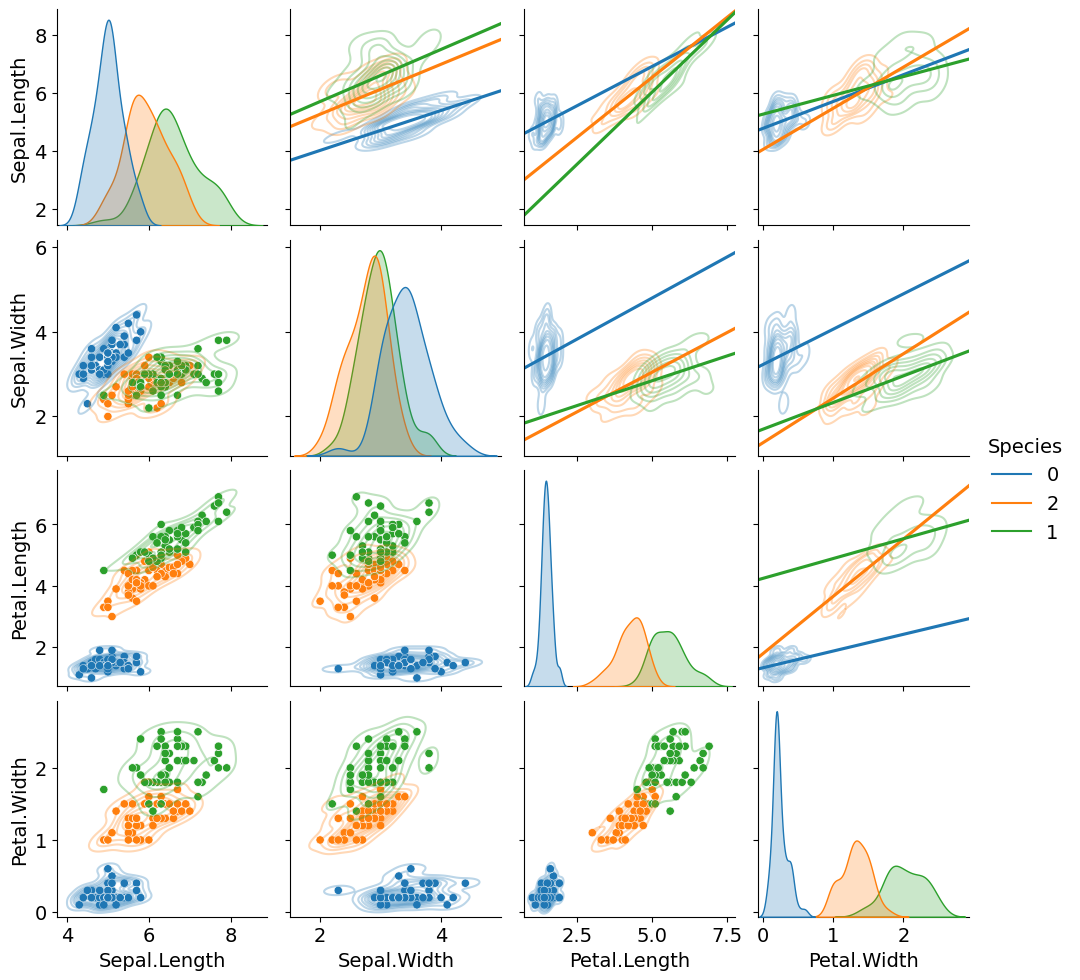

In [29]:
ax = sb.pairplot(origin, 
                 hue='Species',
                 kind='kde',
                 plot_kws={'alpha': 0.3})
ax.map_lower(sb.scatterplot)
ax.map_upper(sb.regplot, scatter=False, truncate=False, ci=False)
plt.show()
plt.close()

### 5) 데이터셋 분할
- 랜덤시드 고정

In [30]:
np.random.seed(777)

- 훈련데이터(독립변수)와 레이블(종속변수) 구분하기

In [31]:
x = origin.drop(['Species'], axis=1)
y = origin['Species']
x.shape, y.shape

((150, 4), (150,))

- 종속변수에 대한 one-hot-encoding
    - 통상적인 더미변수 처리
    - 단 계산(회귀식)을 위한 처리가 아닌 `분류를 위한 처리`이므로 1번째 항목을 제외해서는 안 된다.

In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: category
Categories (3, int64): [0, 2, 1]

In [33]:
y_categ = to_categorical(y)
y_categ

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

- 훈련데이터와 검증데이터로 분할

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y_categ,
                                                    test_size = 0.3,
                                                    random_state=777)
print('훈련용 데이터셋 크기: %s, 훈련용 레이블셋 크기: %s' % (x_train.shape, y_train.shape))
print('검증용 데이터셋 크기: %s, 검증용 레이블셋 크리: %s' % (x_test.shape, y_test.shape))

훈련용 데이터셋 크기: (105, 4), 훈련용 레이블셋 크기: (105, 3)
검증용 데이터셋 크기: (45, 4), 검증용 레이블셋 크리: (45, 3)


### 6) 모델 개발
- 모델 정의

In [36]:
my_model = Sequential()
my_model.add(Dense(64, activation='relu', input_shape=(4, )))
my_model.add(Dense(3, activation='softmax'))
my_model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['acc'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 515 (2.01 KB)
Trainable params: 515 (2.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


- 학습하기

In [37]:
result = my_model.fit(x_train, 
                      y_train, 
                      epochs=500, 
                      validation_data=(x_test, y_test),
                      callbacks= [EarlyStopping(monitor='val_loss',
                                                patience=5,
                                                verbose=1),
                                  ReduceLROnPlateau(monitor='val_loss',
                                                    patience=3,
                                                    factor=0.5,
                                                    min_lr=0.0001,
                                                    verbose=1)])

Epoch 1/500
4/4 [==============================] - 0s 35ms/step - loss: 1.3896 - acc: 0.0286 - val_loss: 1.3436 - val_acc: 0.0889 - lr: 0.0010
Epoch 2/500
4/4 [==============================] - 0s 7ms/step - loss: 1.2689 - acc: 0.2381 - val_loss: 1.2238 - val_acc: 0.3778 - lr: 0.0010
Epoch 3/500
4/4 [==============================] - 0s 7ms/step - loss: 1.1960 - acc: 0.3524 - val_loss: 1.1563 - val_acc: 0.3778 - lr: 0.0010
Epoch 4/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1588 - acc: 0.3143 - val_loss: 1.1041 - val_acc: 0.3778 - lr: 0.0010
Epoch 5/500
4/4 [==============================] - 0s 6ms/step - loss: 1.1155 - acc: 0.3143 - val_loss: 1.0562 - val_acc: 0.3778 - lr: 0.0010
Epoch 6/500
4/4 [==============================] - 0s 7ms/step - loss: 1.0647 - acc: 0.3143 - val_loss: 1.0241 - val_acc: 0.4000 - lr: 0.0010
Epoch 7/500
4/4 [==============================] - 0s 6ms/step - loss: 1.0240 - acc: 0.3905 - val_loss: 0.9917 - val_acc: 0.4889 - lr: 0.0010
Epoch

### 7) 학습 결과 평가
- 기본적인 머신러닝 학습결과 평가

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

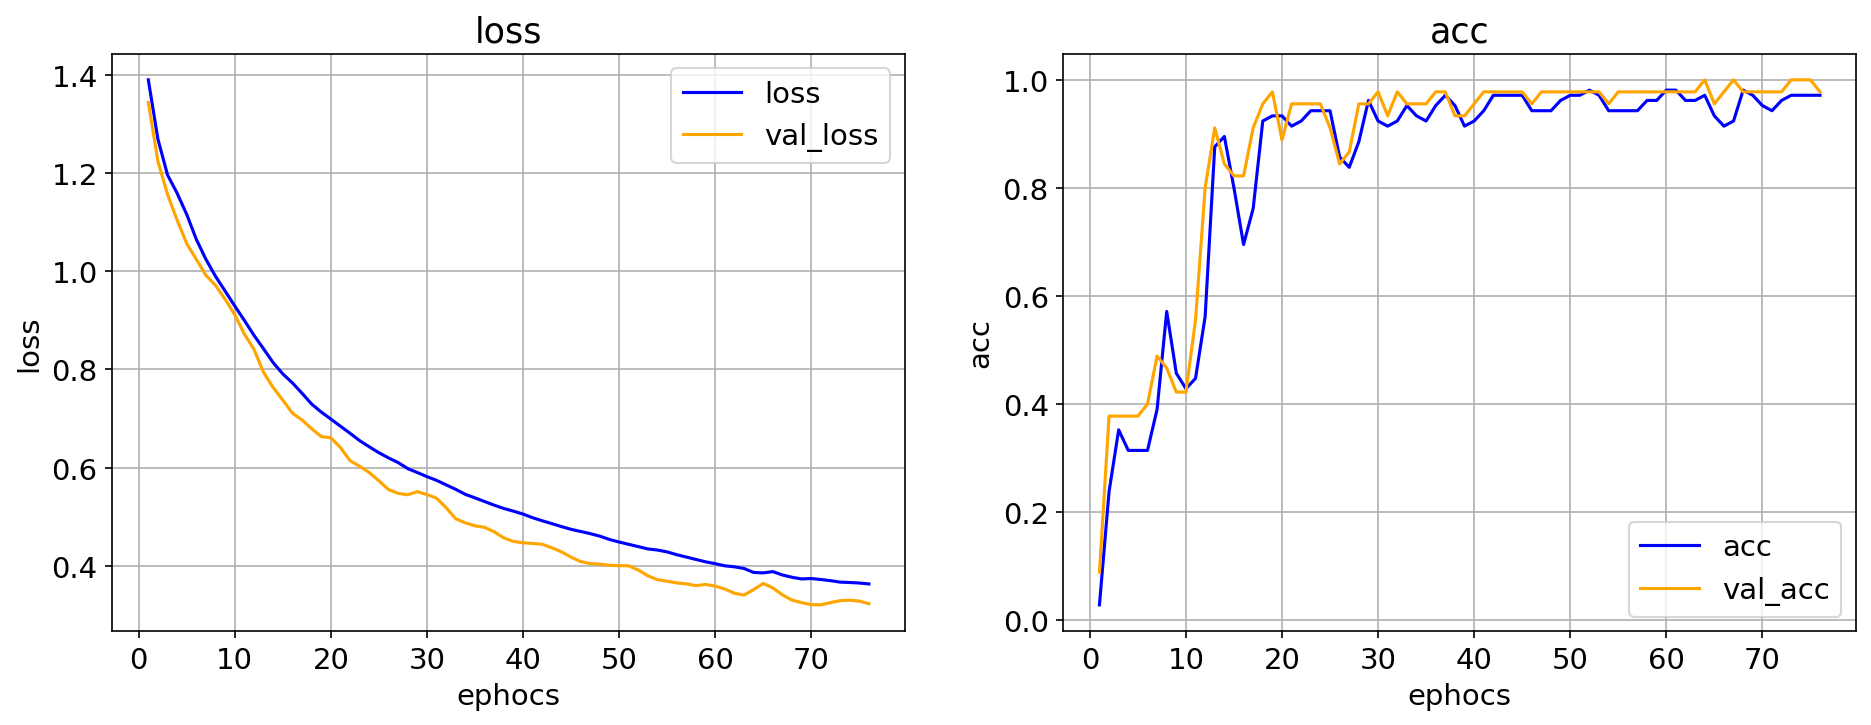

4/4 [==============================] - 0s 886us/step - loss: 0.3625 - acc: 0.9810
최종 훈련 손실률: 0.362540, 최종 훈련 정확도: 0.980952
2/2 [==============================] - 0s 2ms/step - loss: 0.3231 - acc: 0.9778
최종 검증 손실률: 0.323129, 최종 검증 정확도: 0.977778


In [38]:
helper.tf_result_plot(result)

evaluate1 = my_model.evaluate(x_train, y_train)
print('최종 훈련 손실률: %f, 최종 훈련 정확도: %f' % (evaluate1[0], evaluate1[1]))

evaluate2 = my_model.evaluate(x_test, y_test)
print('최종 검증 손실률: %f, 최종 검증 정확도: %f' % (evaluate2[0], evaluate2[1]))

### 8) 학습 결과 적용
- 테스트 데이터에 대한 예측 결과 산정

In [40]:
results = my_model.predict(x_test)
data_count, case_count = results.shape
print('%d개의 검증 데이터가 각각 %d개의 경우의 수를 갖는다.' % (data_count, case_count))
print(results)

2/2 [==============================] - 0s 2ms/step
45개의 검증 데이터가 각각 3개의 경우의 수를 갖는다.
[[2.88456446e-03 6.60360277e-01 3.36755157e-01]
 [9.04110134e-01 4.39552357e-03 9.14943516e-02]
 [4.05443972e-03 6.59151971e-01 3.36793602e-01]
 [5.40050864e-03 7.02075601e-01 2.92523831e-01]
 [3.00269909e-02 4.00632083e-01 5.69340944e-01]
 [9.35539246e-01 2.02169293e-03 6.24390878e-02]
 [3.04777501e-03 6.63066804e-01 3.33885401e-01]
 [3.65235680e-03 7.11820304e-01 2.84527302e-01]
 [9.23367977e-01 2.36719311e-03 7.42649063e-02]
 [9.09815967e-01 3.57377506e-03 8.66101980e-02]
 [3.94620746e-03 6.58438087e-01 3.37615669e-01]
 [3.69279571e-02 3.67608726e-01 5.95463336e-01]
 [4.71091270e-02 3.64471108e-01 5.88419795e-01]
 [7.57392542e-03 5.74454308e-01 4.17971790e-01]
 [4.89251455e-03 6.72353983e-01 3.22753489e-01]
 [8.33802391e-03 6.28231466e-01 3.63430589e-01]
 [8.72985423e-01 6.34213397e-03 1.20672472e-01]
 [8.16046447e-03 5.58428645e-01 4.33410943e-01]
 [8.71873081e-01 6.55885879e-03 1.21568084e-01]
 [4.4

- 가장 큰 확률 값의 인덱스들만 별도의 리스트로 생성

In [41]:
arg_results = np.argmax(results, axis=-1)
arg_results

array([1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 2, 1, 1, 1, 0, 1, 0, 2, 2, 2,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 0, 2, 0, 0, 1, 2, 2,
       0])

- 결과 데이터셋 구성

In [42]:
result_df = DataFrame({'실제값': np.argmax(y_test, axis= -1),
                       '분류결과': arg_results})

result_df

,실제값,분류결과
0,1,1
1,0,0
2,1,1
3,1,1
4,2,2
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


- 컬럼에 따른 값의 종류 형태로 데이터 재배치

In [43]:
mdf = result_df.melt()
mdf.reset_index(inplace=True)
mdf

,index,variable,value
0,0,실제값,1
1,1,실제값,0
2,2,실제값,1
3,3,실제값,1
4,4,실제값,2
...,...,...,...
85,85,분류결과,0
86,86,분류결과,1
87,87,분류결과,2
88,88,분류결과,2


In [44]:
df = pivot_table(mdf,
                 index='value',
                 columns='variable',
                 values='index',
                 aggfunc='count')
df

variable,분류결과,실제값
value,,
0,17,17
1,18,17
2,10,11


In [45]:
cm = confusion_matrix(result_df['실제값'], result_df['분류결과'])
cmdf1 = DataFrame(cm,
                  index=[['실제값', '실제값', '실제값'],
                             [0,1,2]],
                  columns = [['분류결과', '분류결과', '분류결과'],
                             [0,1,2]])
cmdf1

분류결과        
         0   1   2
실제값 0   17   0   0
    1    0  17   0
    2    0   1  10